In [2]:
from os.path import join

from hw2.models import *
from hw2.preprocessing import MnistDataloader

input_path = 'C:\\Users\\Витя Кенг\\PycharmProjects\\HW_IIAD2023\\hw2\\mnist'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath,
                                   test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()


def to_one_hot(y, num_classes):
    return np.eye(num_classes)[y]


y_train = to_one_hot(y_train, 10)
y_test = to_one_hot(y_test, 10)

nn = NeuralNetwork([
    Linear(784, 64),  # 784 - количество признаков (пикселей) в данных MNIST
    ReLU(),
    Linear(64, 10),  # 10 - количество классов в данных MNIST
    Softmax()
])

nn.loss = MSE()
nn.fit(x_train, y_train, epochs=500, batch_size=512, learning_rate=0.001)

y_pred = nn.predict(x_test)
accuracy = (y_pred == np.argmax(y_test, axis=1)).mean()
print(f'Test accuracy: {accuracy}')

Epoch 10/500, Loss: 0.022875623529175087
Epoch 20/500, Loss: 0.026653707728357127
Epoch 30/500, Loss: 0.012855077740060143
Epoch 40/500, Loss: 0.025579417683886826
Epoch 50/500, Loss: 0.014250811110359123
Epoch 60/500, Loss: 0.01112669719960182
Epoch 70/500, Loss: 0.016574271779550787
Epoch 80/500, Loss: 0.016034079345048215
Epoch 90/500, Loss: 0.016760824510100785
Epoch 100/500, Loss: 0.015217207525252845
Epoch 110/500, Loss: 0.011085324680089636
Epoch 120/500, Loss: 0.01133327109311218
Epoch 130/500, Loss: 0.014381229571732594
Epoch 140/500, Loss: 0.011154489859648424
Epoch 150/500, Loss: 0.012351338268175327
Epoch 160/500, Loss: 0.00834897175606064
Epoch 170/500, Loss: 0.009877015518436914
Epoch 180/500, Loss: 0.003996950266953076
Epoch 190/500, Loss: 0.005270268884211338
Epoch 200/500, Loss: 0.0057639122170768066
Epoch 210/500, Loss: 0.0043317594511706175
Epoch 220/500, Loss: 0.016028004480157964
Epoch 230/500, Loss: 0.006795561543802849
Epoch 240/500, Loss: 0.008902301078582243
Ep

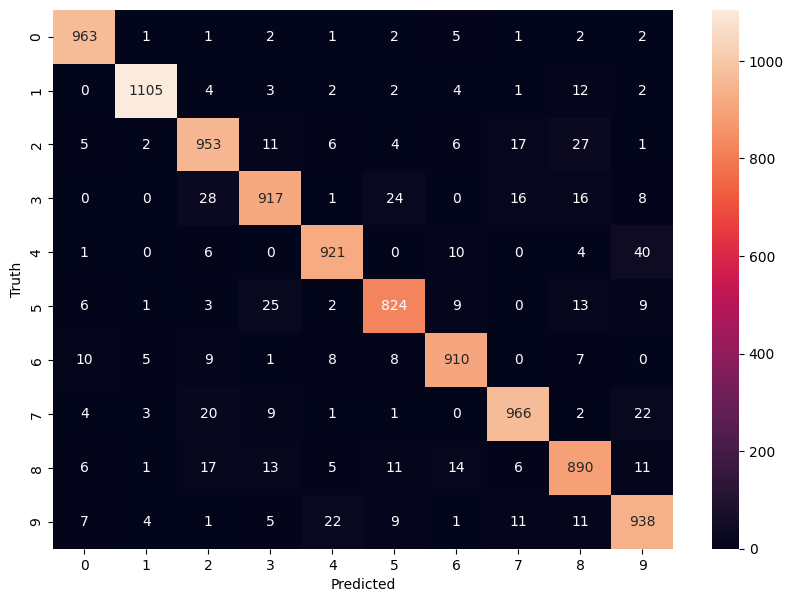

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()